In [1]:
import os
os.chdir('..')
from bilevel.synth_datagen import SynthGenLinear

In [2]:
# os.chdir('folktables-experiments/multidecomp/')
!pwd

/Users/krishna/Documents/Research/Simultaneous Classifier/folktables-experiments/multidecomp


In [3]:
import numpy as np
import pandas as pd

- Each feature $x$ generated from some fixed distribution, e.g. uniform $[0, 1]^d$
- Each group label is linearly realizable i.e. its $w_g^\top x$
- Idea to generate different models for different groups
Sample $w_1, \ldots w_{|G|}$ from a Multivariate uniform with high variance $U[0,1]^n$; fix these to be the true regressors, with perhaps some small noise, i.e. $y_g = w_g^\top x + noise$
- A_t is generated by non atomic discrete prob, see section outline

In [4]:
params = {'samples': 100000, 'dim':20, 
        'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
        'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
        'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 1.0,
        'add_linear_mapping': True, 'add_quad_mapping' : False, 
        'S_lo': 0.0, 'S_hi':0.05,
        'label_noise_width':0, 'drop_sensitive':False
        }

# params = {'samples': 100000, 'dim':20, 
#         'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
#         'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
#         'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 100.0, 
#         'label_noise_width':100, 'drop_sensitive':False
#         }
syn_ob = SynthGenLinear(**params)

In [5]:
syn_ob.df.shape

(100000, 40)

In [6]:
# syn_ob.df[['active_labels', 'bin_masked_labels']]
df = syn_ob.df

In [8]:
# df.at[0, 'bin_masked_labels']

In [9]:
# df.at[0, 'bin_masked_labels'][df.iloc[0][filter_group].to_numpy(dtype=int)]
# # df.iloc[0][filter_group].to_numpy() 

In [10]:
# df['y_min_active']  = None
# df['y_max_active']  = None
# df['y_mean_active'] = None
# for t in tqdm(df.shape[0]):
#     df.at[t, 'bin_masked_labels']

In [7]:
filter_feature = [col for col in df if col.startswith('x')]
filter_label = [col for col in df if col.startswith('y')]
filter_group = [col for col in df if col.startswith('g')]
print(filter_feature, filter_label, filter_group)

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19'] ['y_male', 'y_female', 'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian', 'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active', 'y_dperm_active'] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


In [11]:
df.columns

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active',
       'y_dperm_active'],
      dtype='object')

In [12]:
# syn_ob.all_groupnames[[syn_ob.dperm]]
print(type(syn_ob.dperm), syn_ob.dperm, syn_ob.all_groupnames)
np.array(syn_ob.all_groupnames)[syn_ob.dperm]

<class 'numpy.ndarray'> [5 7 2 1 0 6 3 4] ['male', 'female', 'white', 'black', 'two-or-more', 'some-other', 'asian', 'native-am']


array(['some-other', 'native-am', 'white', 'female', 'male', 'asian',
       'black', 'two-or-more'], dtype='<U11')

In [13]:
df[:20][filter_group+filter_label]

,g_male,g_female,g_white,g_black,g_two-or-more,g_some-other,g_asian,g_native-am,y_male,y_female,y_white,y_black,y_two-or-more,y_some-other,y_asian,y_native-am,y_mean_active,y_min_active,y_max_active,y_dperm_active
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.499885,6.737378,6.626570,6.194130,3.988376,5.701695,7.229307,6.185309,6.063228,5.499885,6.626570,6.626570
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.131266,5.193011,5.243848,4.844978,3.857746,3.414917,5.520953,5.225702,5.218430,5.193011,5.243848,5.243848
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.557603,5.121703,4.254163,4.822740,3.788961,4.795407,5.708670,5.383473,4.687933,4.254163,5.121703,4.254163
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.225374,5.614054,5.558096,5.746878,4.328592,4.712275,6.866568,6.137393,5.391735,5.225374,5.558096,5.558096
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.164044,4.879548,5.035697,4.346347,3.344105,3.030489,5.507929,4.880253,4.612947,4.346347,4.879548,4.879548
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.278735,5.444117,5.565024,5.668992,4.090074,4.604930,6.689488,5.962290,4.684405,4.090074,5.278735,5.278735
6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.444948,3.729107,3.333788,3.593229,2.777108,3.004192,4.483591,3.747303,3.531448,3.333788,3.729107,3.333788
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.754947,5.727226,5.908004,5.805546,4.164540,4.808279,6.840226,6.347263,5.331476,4.754947,5.908004,5.908004
8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.845828,4.303724,5.179629,4.153148,2.939099,3.451631,5.058270,4.223543,3.877677,3.451631,4.303724,3.451631
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.357061,4.569963,5.282385,4.582566,3.566003,4.301554,6.294940,5.593820,4.461532,3.566003,5.357061,5.357061


In [17]:
# df['active_labels']

In [18]:
# df['y_min_active'] = df.apply(lambda x: np.min(x['active_labels']), axis=1)
# df['y_max_active'] = df.apply(lambda x: np.max(x['active_labels']), axis =1)
# df['y_mean_active'] = df.apply(lambda x: np.mean(x['active_labels']), axis =1)


In [8]:
df.columns

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active',
       'y_dperm_active'],
      dtype='object')

In [44]:
# df = pd.read_pickle('./synthetic_res_models/dataframes/goodw0-1_X0-1_linear_racediff.pkl')

# Even though labels for each group are realizable by linear, their combination is not linear!
Single linear learner unable to capture this, and as expected cannot get a perfect r2

In [9]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_mean_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for mean of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.8106203223700613 0.8143394794085463


In [10]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_min_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for min of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.7909332898013222 0.7931222072606718


In [11]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_max_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for max of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.7293910040150045 0.7357989657935662


In [12]:
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_dperm_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for max of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.7192923268971367 0.7238289143078975


In [18]:
syn_ob.S_mat

AttributeError: 'SynthGenLinear' object has no attribute 'S_mat'

# Batch comparing models across different groups, are they similar or not
- use model trained on data for one group, test it on data of another (test its r2 score on data of other)

In [19]:
y_all = [col for col in df if col.startswith('y')]
print(np.all(y_all==filter_label))
print(filter_group)
print(filter_feature)

True
['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']
['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19']


In [13]:
df.columns

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active',
       'y_dperm_active'],
      dtype='object')

In [14]:
# tranining on data for only each group
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df.drop(filter_label, axis = 1), 
                                                    df['y_dperm_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)

models_lr_dict = {}
group_sizes = {}

for g in filter_group:
    indices = (X_train[g] == 1)
    model_lr = LinearRegression()
    model_lr.fit(X_train[indices][filter_feature], y_train[indices])
    key = g
    group_sizes[key] = indices.sum() #sum of all the trues
    models_lr_dict[key] = model_lr

In [15]:
for g in filter_group:
    indices = (X_test[g] == 1)
    key = g
    r2_score_lr = models_lr_dict[key].score(X_test[indices][filter_feature], y_test[indices])
    print(f" {key}, test group size {group_sizes[key]}  r2 score for least squares is {r2_score_lr:.4f}")

 g_male, test group size 40110  r2 score for least squares is 1.0000
 g_female, test group size 39890  r2 score for least squares is 0.8198
 g_white, test group size 48789  r2 score for least squares is 0.8525
 g_black, test group size 9560  r2 score for least squares is 0.6170
 g_two-or-more, test group size 8060  r2 score for least squares is 0.6387
 g_some-other, test group size 6390  r2 score for least squares is 0.6381
 g_asian, test group size 4825  r2 score for least squares is 0.7245
 g_native-am, test group size 2376  r2 score for least squares is 0.6758


In [16]:
def cross_test_models(model_dict: dict):
    '''
        model_dict: maps keys to linear model, these linear models are already trained and have weights
        sex_cats: labels for the different sexes
        race_cats: labels for the different races
        This function computes the performance of one model on another models data

        With an example, model_dict['SEX_1'] has the linear model trained only of those points which have SEX == 1
        we will test its performance on all the other groups data.
    '''
    keys = list(model_dict.keys())
    l = len(keys)
    mat_2d = np.zeros((l, l))
    for i in range(l):
        model_i = model_dict[keys[i]]
        for j in range(l):
            key = keys[j]
            indices_j = (X_test[key] == 1)
            mat_2d[i, j] = model_i.score(X_test[indices_j][filter_feature], y_test[indices_j]) # how model i performs on test data meant for model j, R2 score
    return mat_2d, keys

In [17]:
import numpy as np
crossmat, keys = cross_test_models(models_lr_dict)
print(crossmat, keys)

[[ 1.          0.04233026  0.70934962  0.25159321  0.29391769  0.26302655
   0.51482082  0.34440562]
 [-0.00507723  0.81979982  0.52782454  0.50869591  0.53779884  0.53197262
   0.43359073  0.58600864]
 [ 0.8234922   0.51936877  0.85254579  0.46190171  0.4918691   0.46173371
   0.63638548  0.53141712]
 [ 0.50076627  0.68613191  0.67266457  0.61701939  0.63742301  0.6350935
   0.61013296  0.67428034]
 [ 0.46382195  0.68641291  0.64762927  0.61735987  0.63866271  0.63654647
   0.60275574  0.67450587]
 [ 0.4313033   0.68989137  0.63057787  0.61538616  0.63648009  0.63809656
   0.58763951  0.67348094]
 [ 0.64284121  0.5647126   0.7319367   0.49581942  0.53003429  0.50335963
   0.72451767  0.57356693]
 [ 0.46144913  0.67735343  0.64051662  0.61320848  0.63522657  0.63615716
   0.59604981  0.67580305]] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


<Axes: >

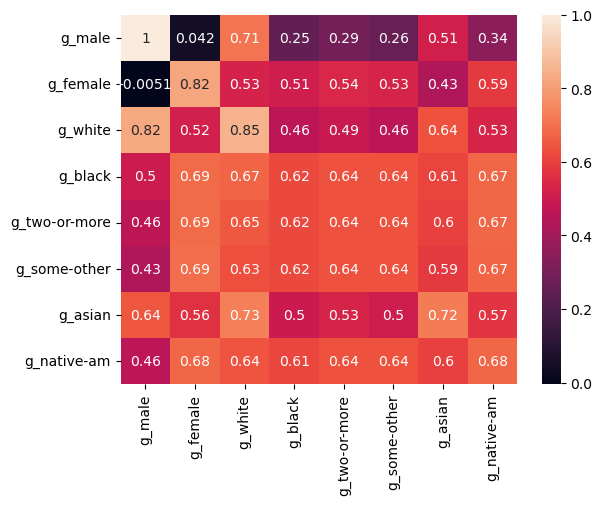

In [18]:
import seaborn as sns # for data visualization
sns.heatmap(crossmat, annot=True, xticklabels=keys, yticklabels=keys)

In [19]:
# df.to_pickle('./synthetic_res_models/dataframes/w0-1_X0-1_linear_racediff.pkl')
df.to_pickle('./synthetic_res_models/dataframes/w0-1_X0-1_ydperm_linearbase2.pkl')

# Online pipeline

In [19]:
from bilevel.OnlineLinearExpert import *
from bilevel.OnlineTreeExpert import *
from bilevel.build_all_models import *

In [23]:
# # reproducible seed for uniforms
# params = {'samples': 10000, 'dim':20, 
#         'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
#         'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
#         'feat_lo': 0.0, 'feat_hi': 100.0, 'w_lo': 0.0, 'w_hi': 100.0, 
#         'label_noise_width':100, 'drop_sensitive':True
#         }
# syn_ob = SynthGenLinear(**params)
# df = syn_ob.df

In [36]:
# print(df.columns)
# filter_feature = [col for col in df if col.startswith('x')]
# filter_label = [col for col in df if col.startswith('y')]
# filter_group = [col for col in df if col.startswith('g')]
# print(filter_feature, filter_label, filter_group)

In [25]:
# df['y_min_active'] = df.apply(lambda x: np.min(x['active_labels']), axis=1)
# df['y_max_active'] = df.apply(lambda x: np.max(x['active_labels']), axis =1)
# df['y_mean_active'] = df.apply(lambda x: np.mean(x['active_labels']), axis =1)

In [24]:
# np.sum(syn_ob.A_t, axis = 0), np.sum(syn_ob.A_t, axis=1)

(array([49746., 50254., 60829., 11942., 10037.,  8034.,  6137.,  3021.]),
 array([2., 2., 2., ..., 2., 2., 2.]))

In [22]:
# need to also minmax scale? so that all in 0-1
from bilevel.utils import numeric_scaler
# y_lab = 'y_dperm_active'
# y_lab = 'y_mean_active'
y_lab = 'y_min_active'
# y_lab = 'y_max_active'


X_dat = df[filter_feature]
y_dat = df[[y_lab]]
A_t = syn_ob.A_t

X_dat = numeric_scaler(X_dat, X_dat.columns)
y_dat = numeric_scaler(y_dat, y_dat.columns)
y_dat = y_dat[y_lab]

In [23]:
X_dat.shape, y_dat.shape, A_t.shape

((100000, 20), (100000,), (100000, 8))

In [24]:
dirname = './synthetic_res_models/baseline'
filename = 'lastAug27quad_leastsq_0-1x_w0-1'+y_lab

In [40]:
exp_ls = OnlineLinearExpert(X_dat, y_dat, l2_pen = 0.0)
b_lsbase = build_baseline_alwayson(dirname, filename, A_t, exp_ls)

100%|██████████| 100000/100000 [01:05<00:00, 1519.95it/s]


In [25]:
dirname = './synthetic_res_models/Anh/'
# filename = 'leastsq_x0-1,w0-100_ymax'
experts_ls = [OnlineLinearExpert(X_dat, y_dat, l2_pen = 0.0) for _ in range(A_t.shape[1])]
b_Anh = build_Anh(dirname, filename, A_t, experts_ls)

100%|██████████| 100000/100000 [02:17<00:00, 729.01it/s]


In [28]:
# b_lsbase.expert.loss_tarr.shape, type(b_Anh.Anh.loss_ada_tarr)
type(b_Anh.Anh.loss_ada_tarr) , np.array(b_Anh.Anh.loss_ada_tarr).shape

(list, (100000,))

In [30]:
loss_anh = np.array(b_Anh.Anh.loss_ada_tarr).reshape(-1,1)
loss_anh.shape

(100000, 1)

In [35]:
(A_t * loss_anh).sum(axis=0) # great just brodcast label, then mult and sum along axis!

array([ 15.72671802, 130.5278351 ,  50.95830369,  35.4314268 ,
        12.65703367,  25.81133883,   9.38035842,  12.01609171])

In [38]:
def Anh_vs_baseline(baseline, Anh):
    for gnum in range(A_t.shape[1]):
        baseline_cl = baseline.cumloss_groupwise[gnum][-1]
        Anh_cl = Anh.cuml_loss_curve[gnum][-1]
        rounds_active = len(Anh.cuml_loss_curve[gnum])
        print(f'''Group {gnum}, active rounds {rounds_active}, Baseline : {baseline_cl},  Anh : {Anh_cl}''')
        print(f'''Group {gnum}, Avg loss Baseline : {baseline_cl / rounds_active},  Avg loss Anh : {Anh_cl / rounds_active}''')
        print(f'''Is Anh better {Anh_cl <= baseline_cl}''')

In [36]:
# for y_dperm
Anh_vs_baseline()

Group 0, active rounds 49770, Baseline : 362.3248092913538,  Anh : 85.55794575610592
Group 0, Avg loss Baseline : 0.007279984112745707,  Avg loss Anh : 0.001719066621581393
Is Anh better True
Group 1, active rounds 50230, Baseline : 544.9101393321995,  Anh : 239.36145878776898
Group 1, Avg loss Baseline : 0.010848300603866205,  Avg loss Anh : 0.004765308755480171
Is Anh better True
Group 2, active rounds 61069, Baseline : 671.3343972613301,  Anh : 256.2593523656907
Group 2, Avg loss Baseline : 0.010993047164049355,  Avg loss Anh : 0.0041962264383842976
Is Anh better True
Group 3, active rounds 11997, Baseline : 37.95982604885837,  Anh : 5.238484545715704
Group 3, Avg loss Baseline : 0.003164109864871082,  Avg loss Anh : 0.00043664954119494075
Is Anh better True
Group 4, active rounds 9758, Baseline : 48.93690331241036,  Anh : 4.761366608509451
Group 4, Avg loss Baseline : 0.0050150546538645585,  Avg loss Anh : 0.000487944928111237
Is Anh better True
Group 5, active rounds 8065, Baselin

In [44]:
# for y_mean
Anh_vs_baseline()

Group 0, active rounds 49770, Baseline : 165.1095815323938,  Anh : 38.16904955241989
Group 0, Avg loss Baseline : 0.00331745190943126,  Avg loss Anh : 0.0007669087713968232
Is Anh better True
Group 1, active rounds 50230, Baseline : 163.67799111585322,  Anh : 39.45693210906633
Group 1, Avg loss Baseline : 0.0032585703984840376,  Avg loss Anh : 0.0007855252261410777
Is Anh better True
Group 2, active rounds 61069, Baseline : 177.4215528004507,  Anh : 23.24550489577441
Group 2, Avg loss Baseline : 0.002905263763946531,  Avg loss Anh : 0.0003806432870322817
Is Anh better True
Group 3, active rounds 11997, Baseline : 49.43309838130681,  Anh : 19.727592398811325
Group 3, Avg loss Baseline : 0.0041204549788536144,  Avg loss Anh : 0.001644377127516156
Is Anh better True
Group 4, active rounds 9758, Baseline : 35.20261311854664,  Anh : 10.408923079575809
Group 4, Avg loss Baseline : 0.0036075643695989584,  Avg loss Anh : 0.0010667066078679861
Is Anh better True
Group 5, active rounds 8065, Bas

In [41]:
# for y_min
Anh_vs_baseline(b_lsbase.expert, b_Anh.Anh)

Group 0, active rounds 50211, Baseline : 132.5610971148741,  Anh : 15.726718016275134
Group 0, Avg loss Baseline : 0.0026400808013159285,  Avg loss Anh : 0.00031321260314025085
Is Anh better True
Group 1, active rounds 49789, Baseline : 240.64041840367605,  Anh : 130.52783509808486
Group 1, Avg loss Baseline : 0.00483320449102565,  Avg loss Anh : 0.0026216199381004814
Is Anh better True
Group 2, active rounds 60931, Baseline : 162.49040800668018,  Anh : 50.95830369151634
Group 2, Avg loss Baseline : 0.0026667937175933465,  Avg loss Anh : 0.0008363280381335665
Is Anh better True
Group 3, active rounds 11991, Baseline : 91.99601309855124,  Anh : 35.43142679861093
Group 3, Avg loss Baseline : 0.007672088491247706,  Avg loss Anh : 0.0029548350261538593
Is Anh better True
Group 4, active rounds 9989, Baseline : 30.055337028349836,  Anh : 12.657033668067099
Group 4, Avg loss Baseline : 0.003008843430608653,  Avg loss Anh : 0.0012670971736977775
Is Anh better True
Group 5, active rounds 8024,

In [27]:
# for y_max
Anh_vs_baseline()

Group 0, active rounds 49770, Baseline : 359.27756085097064,  Anh : 38.27442259556541
Group 0, Avg loss Baseline : 0.007218757501526434,  Avg loss Anh : 0.0007690259713796547
Is Anh better True
Group 1, active rounds 50230, Baseline : 325.9135993812352,  Anh : 7.535953108785945
Group 1, Avg loss Baseline : 0.00648842523155953,  Avg loss Anh : 0.00015002892910185038
Is Anh better True
Group 2, active rounds 61069, Baseline : 443.6018293221776,  Anh : 17.58765073764522
Group 2, Avg loss Baseline : 0.007263944543421009,  Avg loss Anh : 0.00028799637684660335
Is Anh better True
Group 3, active rounds 11997, Baseline : 66.93810265729141,  Anh : 11.893430283385953
Group 3, Avg loss Baseline : 0.005579570113969443,  Avg loss Anh : 0.0009913670320401728
Is Anh better True
Group 4, active rounds 9758, Baseline : 60.60022423434083,  Anh : 6.077201543518285
Group 4, Avg loss Baseline : 0.006210311973185164,  Avg loss Anh : 0.0006227917138264281
Is Anh better True
Group 5, active rounds 8065, Base

In [32]:
# df.to_pickle('./synthetic_res_models/dataframes/leastsq_x0-1,w0-100uniform.pkl')
df.to_pickle('./synthetic_res_models/dataframes/leastsq_x0-1,w0-1_senspresent.pkl')

masked array

In [ ]:
# mask = ma.masked_array(ar, mask=A_t==0), true entries in the bool are masked i.e. not used for computation
# masked_mul = mask * y_labels_mat # gets all the valid labels
# then can do max, min easily, avg easily; ignores the masked ones
#mean_ar = np.mean(masked_mul, axis=1)
#  ma.getdata(mean_ar) to get back the above

# for dominance order->
# can also permute simply masked_mul[:, [column perm]]
# 

Tree expert on this same data?

In [30]:
# hoeffding tree?
dirname = './synthetic_res_models/baseline'
filename = 'hoefftree_linear0-1x_w0-1'+y_lab

In [39]:
filename

'hoefftree_linear0-1x_w0-1y_min_active'

In [35]:
X_datdict = X_dat.to_dict(orient='records')

In [37]:
exp_tree = OnlineHoeffdingTree(X_datdict, y_dat)
b_treebase = build_baseline_alwayson(dirname, filename, A_t, exp_tree)

100%|██████████| 100000/100000 [00:18<00:00, 5400.83it/s]


In [43]:
dirname = './synthetic_res_models/Anh/'
experts_tree = [OnlineHoeffdingTree(X_datdict, y_dat) for _ in range(A_t.shape[1])]
b_Anh = build_Anh(dirname, filename, A_t, experts_tree)

100%|██████████| 100000/100000 [00:47<00:00, 2095.99it/s]


In [45]:
Anh_vs_baseline(b_treebase.expert, b_Anh.Anh) # tree always beaten by linear, nice

Group 0, active rounds 49891, Baseline : 334.0208303215698,  Anh : 89.76943541718342
Group 0, Avg loss Baseline : 0.006695011732007172,  Avg loss Anh : 0.0017993112067744366
Is Anh better True
Group 1, active rounds 50109, Baseline : 288.141421232839,  Anh : 79.53415111956161
Group 1, Avg loss Baseline : 0.005750292786382466,  Avg loss Anh : 0.0015872228765204178
Is Anh better True
Group 2, active rounds 60892, Baseline : 164.83963015609982,  Anh : 102.60192325634385
Group 2, Avg loss Baseline : 0.0027070818852410797,  Avg loss Anh : 0.001684981988706954
Is Anh better True
Group 3, active rounds 11833, Baseline : 34.87976170835554,  Anh : 25.611028089503833
Group 3, Avg loss Baseline : 0.0029476685293970705,  Avg loss Anh : 0.002164373201175005
Is Anh better True
Group 4, active rounds 10149, Baseline : 25.292993452568034,  Anh : 16.07822539569384
Group 4, Avg loss Baseline : 0.002492166070801856,  Avg loss Anh : 0.001584217695900467
Is Anh better True
Group 5, active rounds 8022, Base